In [15]:
import planetary_computer
import pystac_client

from dep_coastlines.grid import grid
from dep_coastlines.raster_cleaning import load_esa_water_land
from dep_tools.loaders2 import LandsatPystacSearcher, OdcLoader, SearchLoader

In [20]:
client = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
searcher = LandsatPystacSearcher(client=client, datetime="2017")
stacloader = OdcLoader(
        chunks=dict(band=1, time=1, x=4096, y=4096),
        resampling={"qa_pixel": "nearest", "*": "cubic"},
        fail_on_error=False,
        bands=["qa_pixel", "nir08"],
        groupby="solar_day",
)
loader = SearchLoader(searcher, stacloader)


In [18]:
area = grid.loc[[(72, 24)]]

In [33]:
d = loader.load(area)
#d = d.rio.clip(area.to_crs(d.rio.crs).geometry)


<xarray.Dataset>
Dimensions:      (y: 2307, x: 3242, time: 10)
Coordinates:
  * y            (y) float64 -1.489e+06 -1.489e+06 ... -1.558e+06 -1.558e+06
  * x            (x) float64 3.618e+05 3.618e+05 3.618e+05 ... 4.59e+05 4.59e+05
    spatial_ref  int32 32602
  * time         (time) datetime64[ns] 2017-01-04T21:34:43.880505 ... 2017-03...
Data variables:
    qa_pixel     (time, y, x) uint16 dask.array<chunksize=(1, 2307, 3242), meta=np.ndarray>
    nir08        (time, y, x) uint16 dask.array<chunksize=(1, 2307, 3242), meta=np.ndarray>

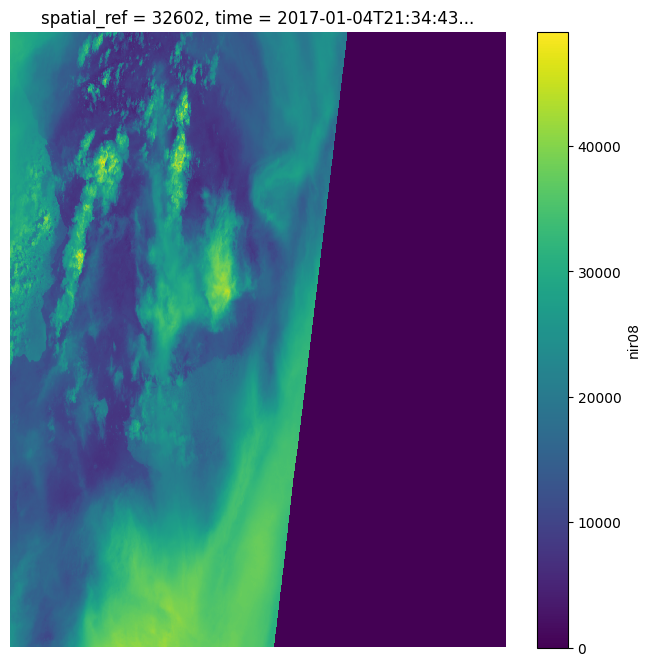

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_axis_off()
img = d.isel(time=0).nir08
img.plot.imshow(ax=ax)



In [ ]:
esa_water_land = load_esa_water_land(d)
esa_water_land